<a href="https://colab.research.google.com/github/joyzinhw/analise-de-dados/blob/main/2-Trabalho_Avaliativo_de_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Avaliativo - Regressão
#### A 2º nota da disciplina será dividida em 3 partes, dois trabalhos de regressão (6 pontos) e um de classificação que passarei futuramente (4 pontos).

**JOYCE MOURA SILVA**

# 1) CRIANDO UM MODELO DE REGRESSÃO LINEAR SIMPLES (3 PONTOS) - MESMO GRUPO DOS TRABALHOS ANTERIORES
#### Com base nas formulas apresentadas abaixo, crie em python um algoritmo de regressão linear simples que receba os dados de um unico atributo e realize a predição do preço dos imoveis.

A fórmula básica da regressão linear simples é:

![Equação:](img/equacao.PNG)

Onde:

* y é a é a variável dependente (target previsto)
* x é a variável independente (feature conhecida)
* 𝛽0 é o coeficiente liner (interceptação no eixo y)
* 𝛽1 é o coeficiente de inclinação

Os coeficientes 𝛽0 e 𝛽1 podem ser calculados com fórmulas derivadas do método dos mínimos quadrados:

![Equação2:](img/equacao-betas.PNG)

* X𝑖 e Y𝑖 são os valores observados das variáveis independente e dependente, respectivamente.
* x̅ é a média dos valores de
* $\bar{y}$ é a média dos valores de
* n é o número de observações.

#### CARREGANDO OS DADOS

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler


housing = fetch_california_housing()
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)
dataset['Price'] = housing.target

print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


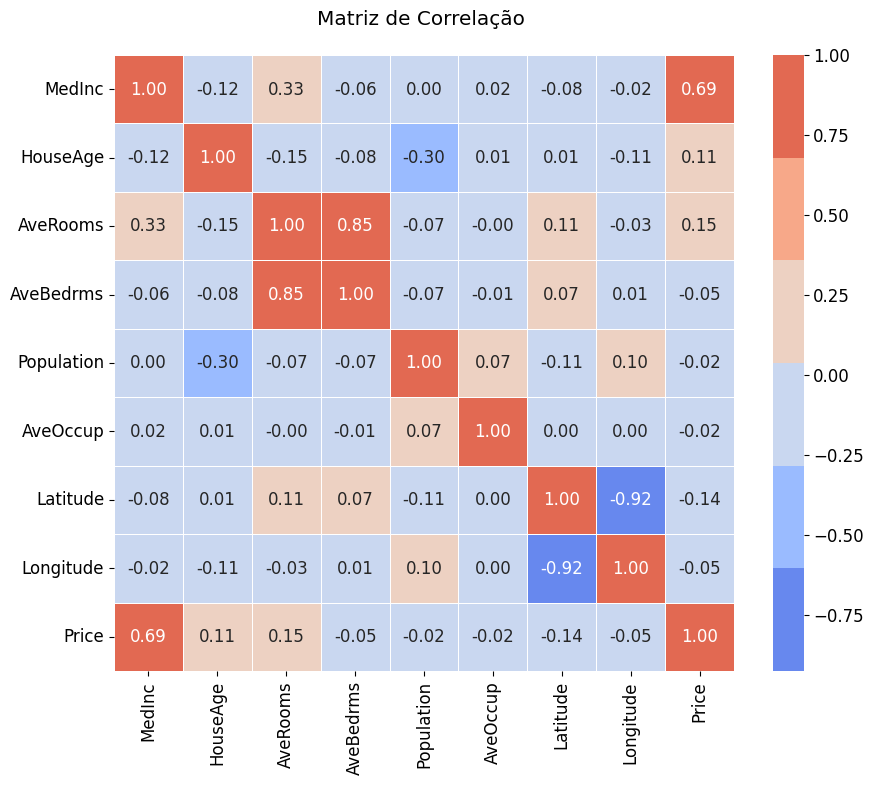

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=sns.color_palette("coolwarm"), linewidths=.5, annot=True, fmt='.2f')
plt.title('Matriz de Correlação \n')
plt.show()




In [59]:
X = dataset[['MedInc']]
y = dataset['Price']

#### FAÇA SEU CÓDIGO AQUI:

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_mean = np.mean(X_scaled)
y_mean = np.mean(y)
numerator = np.sum((X_scaled.flatten() - X_mean) * (y - y_mean))
denominator = np.sum((X_scaled.flatten() - X_mean)**2)
beta1 = numerator / denominator
beta0 = y_mean - (beta1 * X_mean)

print(f"Coeficiente linear (β0): {beta0}")
print(f"Coeficiente de inclinação (β1): {beta1}")


y_pred = beta0 + beta1 * X_scaled.flatten()



Coeficiente linear (β0): 2.068558169089147
Coeficiente de inclinação (β1): 0.7939893889648998


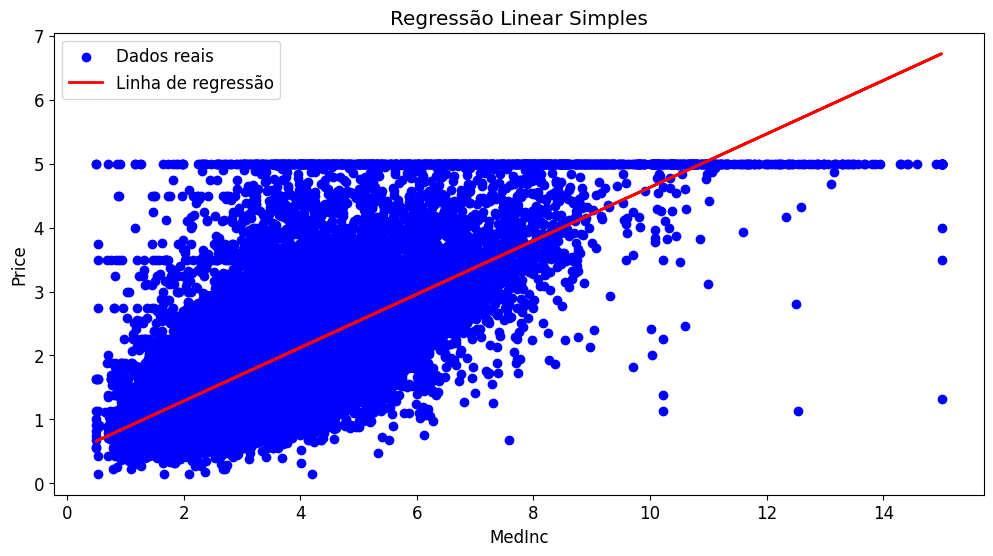

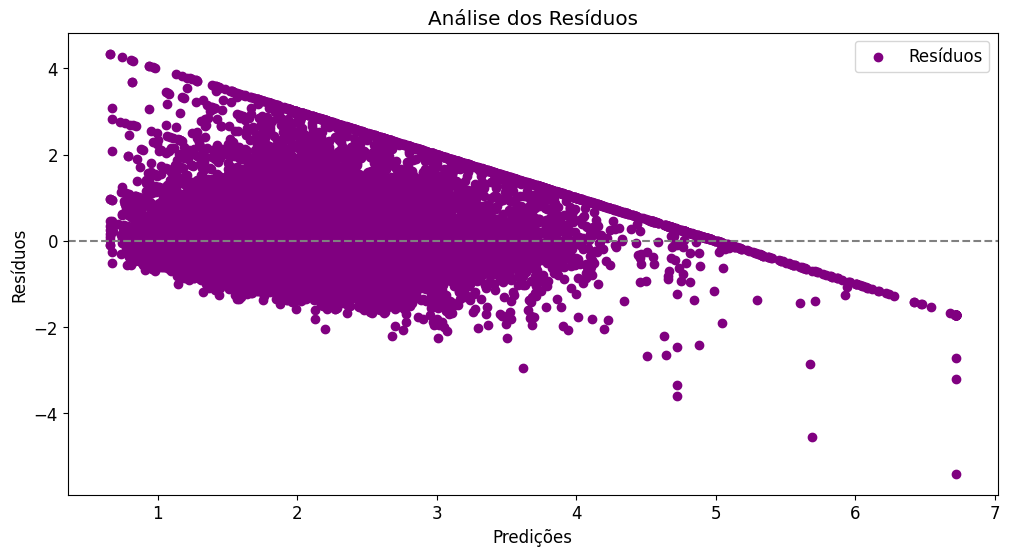

In [61]:

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.xlabel('MedInc')
plt.ylabel('Price')
plt.title('Regressão Linear Simples')
plt.legend()

residuals = y - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, color='purple', label='Resíduos')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Análise dos Resíduos')
plt.legend()
plt.show()


# 2) REALIZANDO A PREDIÇÃO DE PREÇOS DE ALUGUEIS (3 PONTOS) - INDIVIDUAL

* A Atividade consiste em treinar um modelo para estimar o preço de alugueis (coluna **aluguel**)
* Os dados devem ser divididos em treino e teste.
* No teste devem ser calculadas as métricas: MSE, RMSE, MAE, MRAE, MAPE e R²
* O aluno que obtiver os melhores resultados receberá 10 como média geral da disciplina e estara automaticamente aprovado, ficando livre de todos os outros trabalhos.
* Observações:
    * é necessário realizar pré-processamento.
    * não se deve utilizar a coluna total_reais
    * podem utilizar técnicas como gridSearch, data augmentation, etc... para tentar melhorar os resultados.

In [33]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("preco-de-aluguel.csv", index_col=0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   hoa             6080 non-null   object
 9   rent amount     6080 non-null   object
 10  property tax    6080 non-null   object
 11  fire insurance  6080 non-null   object
 12  total           6080 non-null   object
dtypes: int64(5), object(8)
memory usage: 665.0+ KB


In [35]:
# Renomear as colunas
df = df.rename(columns={
    'city': 'cidade',
    'rooms': 'quartos',
    'bathroom': 'banheiro',
    'parking spaces': 'garagens',
    'floor': 'andar',
    'furniture': 'mobilia',
    'hoa': 'condominio_reais',
    'rent amount': 'aluguel',
    'property tax': 'iptu',
    'fire insurance': 'seguro_incendio',
    'total': 'total_reais'
})

# Remover a coluna 'total_reais'
df = df.drop(columns=['total_reais'])

df.head()

,cidade,area,quartos,banheiro,garagens,andar,animal,mobilia,condominio_reais,aluguel,iptu,seguro_incendio
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16


#### FAÇA SEU CÓDIGO AQUI:

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [37]:
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(value)
    except ValueError:
        return np.nan

df['aluguel'] = df['aluguel'].apply(convert_currency)
df['condominio_reais'] = df['condominio_reais'].apply(convert_currency)
df['iptu'] = df['iptu'].apply(convert_currency)
df['seguro_incendio'] = df['seguro_incendio'].apply(convert_currency)

numeric_features = ['area', 'quartos', 'banheiro', 'garagens', 'andar', 'condominio_reais', 'iptu', 'seguro_incendio']
for column in numeric_features:
    non_numeric_values = df[column].apply(lambda x: isinstance(x, str) and not x.replace('.', '', 1).isdigit())
    if non_numeric_values.any():
        print(f"Valores não numéricos encontrados na coluna {column}:")
        print(df[non_numeric_values][column].unique())

df[numeric_features] = df[numeric_features].apply(pd.to_numeric, errors='coerce')

X = df.drop(columns=['aluguel'])
y = df['aluguel']

categorical_features = ['cidade', 'animal', 'mobilia']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, 30],
}


Verificando coluna: area
Verificando coluna: quartos
Verificando coluna: banheiro
Verificando coluna: garagens
Verificando coluna: andar
Valores não numéricos encontrados na coluna andar:
['-']
Verificando coluna: condominio_reais
Verificando coluna: iptu
Verificando coluna: seguro_incendio


In [38]:

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3

In [39]:

mrae = np.mean(np.abs(y_test - y_pred) / y_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MRAE: {mrae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

MSE: 7198.52
RMSE: 84.84
MAE: 21.26
MRAE: 8.70
MAPE: 869.58%
R²: 0.77
